<a href="https://colab.research.google.com/github/awaiskhan005/DATA-SCIENCE-AND-AI-/blob/main/STOCKS_PRICES_PREDICTION_USING_DIFFERENT_ML_MODELS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np


In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
%matplotlib inline
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
import warnings
warnings.filterwarnings('ignore')


In [3]:
df = pd.read_csv("/content/sample_data/SMCI.csv")

In [4]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-07-08,18.870001,18.870001,18.610001,18.610001,18.610001,5100
1,2019-07-09,18.620001,18.840000,18.500000,18.650000,18.650000,80600
2,2019-07-10,18.740000,19.299999,18.500000,19.200001,19.200001,42500
3,2019-07-11,19.400000,19.400000,18.730000,18.850000,18.850000,41400
4,2019-07-12,18.799999,18.990000,18.580000,18.580000,18.580000,40800


Exploratory Data Analysis (EDA)


In [6]:
# Check for missing values
print(df.isnull().sum())


Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


In [7]:
print(df.describe())

              Open         High          Low        Close    Adj Close  \
count  1258.000000  1258.000000  1258.000000  1258.000000  1258.000000   
mean    147.097138   152.007806   142.243084   147.240119   147.240119   
std     242.192966   251.288218   232.016842   241.777740   241.777740   
min      15.820000    16.990000    15.760000    15.980000    15.980000   
25%      28.757500    29.319999    28.237500    28.825000    28.825000   
50%      40.315000    41.065000    39.619999    40.405000    40.405000   
75%     105.037498   107.787502   101.642500   105.350000   105.350000   
max    1212.000000  1229.000000  1122.339966  1188.069946  1188.069946   

             Volume  
count  1.258000e+03  
mean   1.643197e+06  
std    3.165977e+06  
min    1.300000e+03  
25%    1.951250e+05  
50%    3.813000e+05  
75%    1.707675e+06  
max    3.380240e+07  


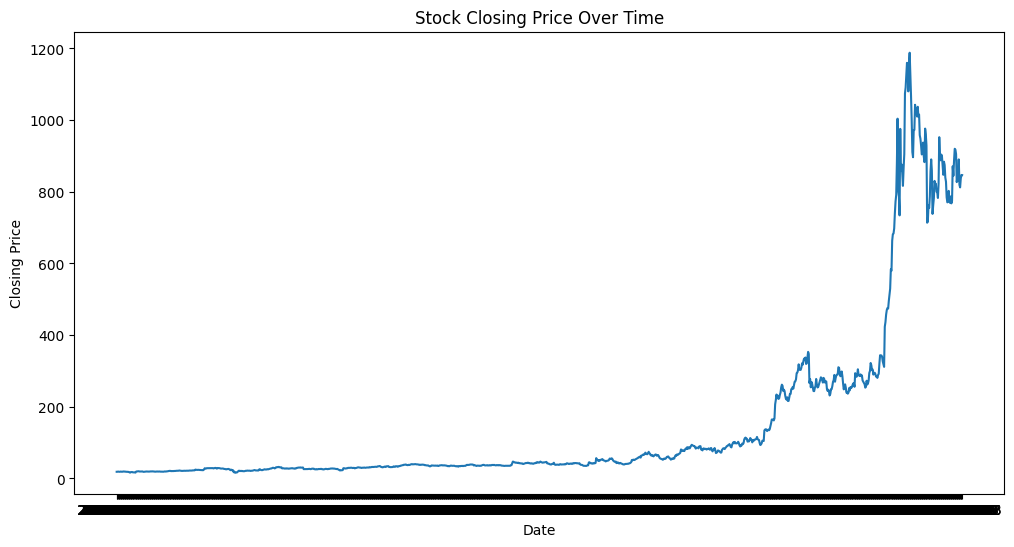

In [8]:
# Visualize the closing price over time
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Close'])
plt.title('Stock Closing Price Over Time')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.show()

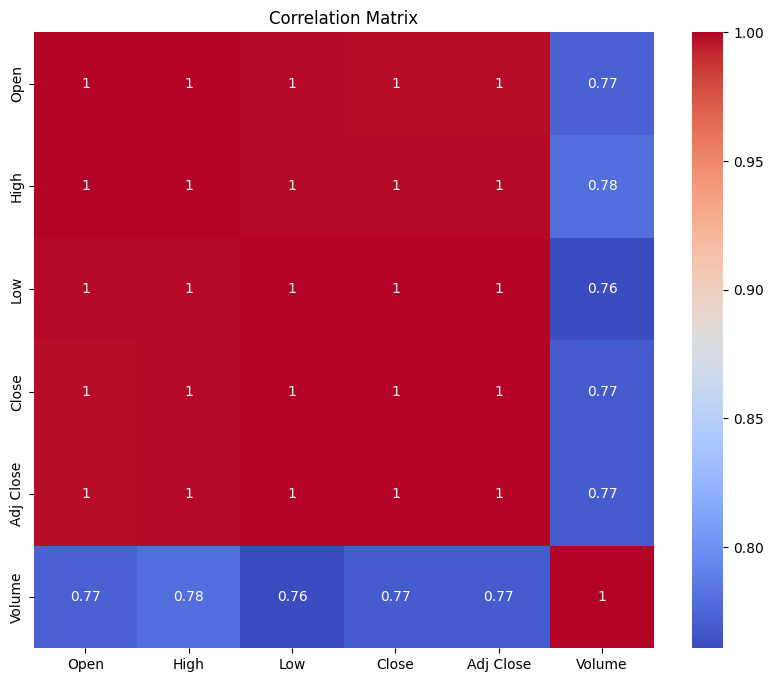

In [10]:
df['Date'] = pd.to_datetime(df['Date'])

numerical_df = df.select_dtypes(include=['number'])

plt.figure(figsize=(10, 8))
sns.heatmap(numerical_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

Feature **Engineering

In [11]:
df.set_index('Date', inplace=True)

df['Year'] = df.index.year
df['Month'] = df.index.month
df['Day'] = df.index.day

In [12]:
X = df[['Open', 'High', 'Low', 'Volume', 'Year', 'Month', 'Day']]
y = df['Close']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Model Selection and Training

Linear Regression


In [13]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

print('Linear Regression')
print('MSE:', mean_squared_error(y_test, y_pred_lr))
print('R2 Score:', r2_score(y_test, y_pred_lr))

Linear Regression
MSE: 52.58242032074812
R2 Score: 0.9989780588009604


Random Forest

In [14]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print('Random Forest')
print('MSE:', mean_squared_error(y_test, y_pred_rf))
print('R2 Score:', r2_score(y_test, y_pred_rf))

Random Forest
MSE: 94.73987302119781
R2 Score: 0.9981587272164051


Support Vector Machine

In [15]:
svm = SVR(kernel='rbf')
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)

print('Support Vector Machine')
print('MSE:', mean_squared_error(y_test, y_pred_svm))
print('R2 Score:', r2_score(y_test, y_pred_svm))


Support Vector Machine
MSE: 41841.13714309094
R2 Score: 0.18681601949161875
